In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
df0 = pd.read_pickle('Model_no_review.pkl')

In [3]:
model = df0.copy()

In [4]:
# Shape of data set
print(str(len(model))+' rows.\n'+str(len(model.columns))+' columns.')
print(str(len(model.columns)-1)+' features.')

785 rows.
45 columns.
44 features.


In [5]:
# null check
model.isnull().sum().sum()

0

Text(0.5, 1.0, 'Distribution of daily prices')

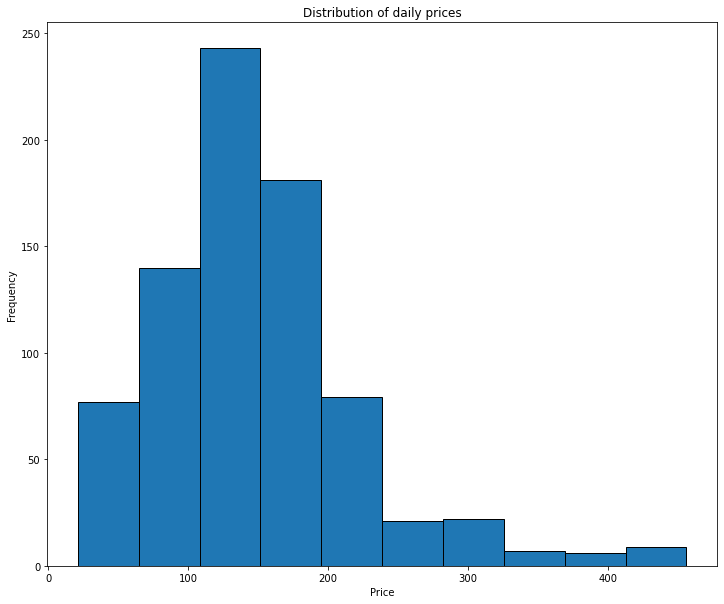

In [6]:
# Plot price
import matplotlib.pyplot as plt
plt.figure(figsize = (12,10))
model['price'].plot(kind = 'hist', bins = 10, edgecolor = 'black')
plt.xlabel('Price')
plt.title('Distribution of daily prices')

In [7]:
# PRE PROCESSING
X = model.drop(['price'],axis = 1)
y = model['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

MSE: 3964.9115432479744
RMSE: 62.96754357006453
RRMSE: 0.41018140142064946
MAE: 42.11222534311538
RMAE: 0.2743262739630412
EV: 0.3574647933089963
R2: 0.3527838067191388


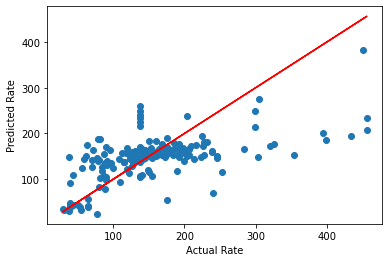

In [8]:
# REGRESSION MODELING #
lm = LinearRegression()
lm.fit(X_train,y_train)

# PREDICTIONS
plm = lm.predict(X_test)
plt.scatter(y_test,plm)
plt.plot(y_test,y_test,"r")
plt.xlabel('Actual Rate')
plt.ylabel('Predicted Rate')

# EVALUATE THE MODEL
print("MSE:",metrics.mean_squared_error (y_test,plm))
print("RMSE:", np.sqrt(metrics.mean_squared_error (y_test,plm)))
print("RRMSE:",np.sqrt(metrics.mean_squared_error (y_test,plm))/y_test.mean())
print("MAE:", metrics.mean_absolute_error (y_test, plm))
print("RMAE:", metrics.mean_absolute_error (y_test, plm)/y_test.mean())
print("EV:", metrics.explained_variance_score(y_test,plm))
print("R2:", metrics.r2_score(y_test,plm))

MSE: 2486.068691926505
RMSE: 49.86049229526825
RRMSE: 0.3247998166299703
MAE: 30.315536967369674
RMAE: 0.1974806183166223
EV: 0.5945151542101618
R2: 0.5941841583418219


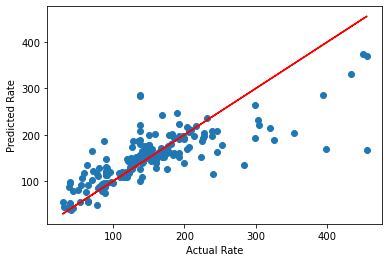

In [9]:
# RANDOM FOREST #
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
rf.fit(X_train,y_train)
p2 = rf.predict(X_test)

# PREDICTIONS
plt.scatter(y_test,p2)
plt.plot(y_test,y_test,"r")
plt.xlabel('Actual Rate')
plt.ylabel('Predicted Rate')

# EVALUATE THE MODEL RFR1
print("MSE:",metrics.mean_squared_error (y_test,p2))
print("RMSE:", np.sqrt(metrics.mean_squared_error (y_test,p2)))
print("RRMSE:",np.sqrt(metrics.mean_squared_error (y_test,p2))/y_test.mean())
print("MAE:", metrics.mean_absolute_error (y_test, p2))
print("RMAE:", metrics.mean_absolute_error (y_test, p2)/y_test.mean())
print("EV:", metrics.explained_variance_score(y_test,p2))
print("R2:", metrics.r2_score(y_test,p2))

Epoch 1/1000
19/19 [==============================] - 1s 11ms/step - loss: 26030.0859 - val_loss: 29246.9473
Epoch 2/1000
19/19 [==============================] - 0s 4ms/step - loss: 25525.0566 - val_loss: 28659.2441
Epoch 3/1000
19/19 [==============================] - 0s 5ms/step - loss: 24849.8906 - val_loss: 27823.8672
Epoch 4/1000
19/19 [==============================] - 0s 4ms/step - loss: 23806.2031 - val_loss: 26509.8555
Epoch 5/1000
19/19 [==============================] - 0s 4ms/step - loss: 22316.1426 - val_loss: 24541.5156
Epoch 6/1000
19/19 [==============================] - 0s 6ms/step - loss: 20057.1816 - val_loss: 21794.8359
Epoch 7/1000
19/19 [==============================] - 0s 7ms/step - loss: 16976.2324 - val_loss: 18281.6113
Epoch 8/1000
19/19 [==============================] - 0s 5ms/step - loss: 13532.5469 - val_loss: 14460.9326
Epoch 9/1000
19/19 [==============================] - 0s 6ms/step - loss: 10042.5283 - val_loss: 10960.1914
Epoch 10/1000
19/19 [======

19/19 [==============================] - 0s 6ms/step - loss: 2625.8965 - val_loss: 3968.8379
Epoch 78/1000
19/19 [==============================] - 0s 7ms/step - loss: 2651.2017 - val_loss: 3983.3616
Epoch 79/1000
19/19 [==============================] - 0s 7ms/step - loss: 2502.9368 - val_loss: 3984.3647
Epoch 80/1000
19/19 [==============================] - 0s 4ms/step - loss: 2595.7532 - val_loss: 3972.5532
Epoch 81/1000
19/19 [==============================] - 0s 7ms/step - loss: 2605.8042 - val_loss: 3949.3931
Epoch 82/1000
19/19 [==============================] - 0s 7ms/step - loss: 2727.1460 - val_loss: 3941.2288
Epoch 83/1000
19/19 [==============================] - 0s 5ms/step - loss: 2349.2839 - val_loss: 3944.0120
Epoch 84/1000
19/19 [==============================] - 0s 6ms/step - loss: 2685.5854 - val_loss: 3899.3811
Epoch 85/1000
19/19 [==============================] - 0s 4ms/step - loss: 2526.3892 - val_loss: 3909.2788
Epoch 86/1000
19/19 [==============================

19/19 [==============================] - 0s 6ms/step - loss: 2084.0356 - val_loss: 3670.1409
Epoch 154/1000
19/19 [==============================] - 0s 4ms/step - loss: 2295.2195 - val_loss: 3648.3105
Epoch 155/1000
19/19 [==============================] - 0s 4ms/step - loss: 2096.2390 - val_loss: 3662.6440
Epoch 156/1000
19/19 [==============================] - 0s 5ms/step - loss: 2168.4141 - val_loss: 3634.1946
Epoch 157/1000
19/19 [==============================] - 0s 6ms/step - loss: 2231.5889 - val_loss: 3667.3901
Epoch 158/1000
19/19 [==============================] - 0s 5ms/step - loss: 1993.0210 - val_loss: 3678.0283
Epoch 159/1000
19/19 [==============================] - 0s 4ms/step - loss: 1983.4545 - val_loss: 3630.7371
Epoch 160/1000
19/19 [==============================] - 0s 3ms/step - loss: 2215.1870 - val_loss: 3620.8435
Epoch 161/1000
19/19 [==============================] - 0s 5ms/step - loss: 1926.5275 - val_loss: 3651.5286
Epoch 162/1000
19/19 [=====================

<AxesSubplot:>

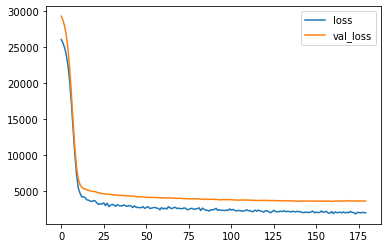

In [10]:
# DEEP LEARNING #
# Creating Model: dm1
dm1 = Sequential()
dm1.add(Dense(40,activation = 'relu'))
dm1.add(Dropout(.10))
dm1.add(Dense(20,activation = 'relu'))
dm1.add(Dropout(.10))
dm1.add(Dense(1, activation = 'linear'))

dm1.compile(optimizer = 'adam', loss = 'mse', )
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20,
        restore_best_weights=True)
# Training DM1
dm1.fit(x = X_train, y = y_train, epochs = 1000,validation_data = (X_test,y_test), callbacks = [early_stop], batch_size = 32)
# MODEL OVERFIT? DM1
pd.DataFrame(dm1.history.history).plot()

7/7 [==============================] - 0s 5ms/step
MSE: 3620.843510439278
RMSE: 60.17344522660538
RRMSE: 0.39198016457309914
MAE: 39.726226649730165
RMAE: 0.2587834683785803
EV: 0.4117277565686801
R2: 0.40894808680334427


Text(0, 0.5, 'Predicted Rate')

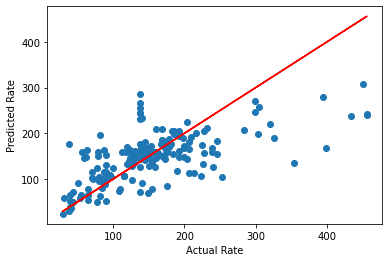

In [11]:
# MODEL EVALUATION DM1
pdm1 = dm1.predict(X_test)

print("MSE:",metrics.mean_squared_error (y_test,pdm1))
print("RMSE:", np.sqrt(metrics.mean_squared_error (y_test,pdm1)))
print("RRMSE:",np.sqrt(metrics.mean_squared_error (y_test,pdm1))/y_test.mean())
print("MAE:", metrics.mean_absolute_error (y_test, pdm1))
print("RMAE:", metrics.mean_absolute_error (y_test, pdm1)/y_test.mean())
print("EV:", metrics.explained_variance_score(y_test,pdm1))
print("R2:", metrics.r2_score(y_test,pdm1))

# PLOT THE PREDICTIONS DM1
plt.scatter(y_test,pdm1)
plt.plot(y_test,y_test,"r")
plt.xlabel('Actual Rate')
plt.ylabel('Predicted Rate')

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

# LSTM
model0 = Sequential()
model0.add(Dense(40,activation = 'relu'))
model0.add(Dropout(.10))
model0.add(Dense(20,activation = 'relu'))
model0.add(Dropout(.10))
model0.add(Dense(1, activation = 'linear'))

cp0 = ModelCheckpoint('model0/', save_best_only = True)
model0.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate=.0001), metrics = [RootMeanSquaredError()])
history = model0.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 1000, callbacks =[cp0])

Epoch 1/1000
19/19 [==============================] - 2s 91ms/step - loss: 26112.2578 - root_mean_squared_error: 161.5929 - val_loss: 29534.1094 - val_root_mean_squared_error: 171.8549
Epoch 2/1000
19/19 [==============================] - 2s 94ms/step - loss: 26074.3105 - root_mean_squared_error: 161.4754 - val_loss: 29492.9590 - val_root_mean_squared_error: 171.7351
Epoch 3/1000
19/19 [==============================] - 1s 82ms/step - loss: 26045.4238 - root_mean_squared_error: 161.3859 - val_loss: 29452.5859 - val_root_mean_squared_error: 171.6176
Epoch 4/1000
19/19 [==============================] - 2s 86ms/step - loss: 26007.2090 - root_mean_squared_error: 161.2675 - val_loss: 29411.1973 - val_root_mean_squared_error: 171.4969
Epoch 5/1000
19/19 [==============================] - 1s 66ms/step - loss: 25959.4590 - root_mean_squared_error: 161.1194 - val_loss: 29369.1289 - val_root_mean_squared_error: 171.3742
Epoch 6/1000
19/19 [==============================] - 1s 56ms/step - loss: 

19/19 [==============================] - 1s 73ms/step - loss: 24770.8555 - root_mean_squared_error: 157.3876 - val_loss: 28030.5312 - val_root_mean_squared_error: 167.4232
Epoch 26/1000
19/19 [==============================] - 1s 77ms/step - loss: 24657.9648 - root_mean_squared_error: 157.0285 - val_loss: 27926.5195 - val_root_mean_squared_error: 167.1123
Epoch 27/1000
19/19 [==============================] - 1s 70ms/step - loss: 24549.9434 - root_mean_squared_error: 156.6842 - val_loss: 27817.4688 - val_root_mean_squared_error: 166.7857
Epoch 28/1000
19/19 [==============================] - 1s 64ms/step - loss: 24470.7402 - root_mean_squared_error: 156.4313 - val_loss: 27705.6719 - val_root_mean_squared_error: 166.4502
Epoch 29/1000
19/19 [==============================] - 1s 53ms/step - loss: 24346.6270 - root_mean_squared_error: 156.0341 - val_loss: 27587.6621 - val_root_mean_squared_error: 166.0953
Epoch 30/1000
19/19 [==============================] - 2s 102ms/step - loss: 24245.3

19/19 [==============================] - 1s 43ms/step - loss: 20908.9004 - root_mean_squared_error: 144.5991 - val_loss: 23927.4316 - val_root_mean_squared_error: 154.6849
Epoch 50/1000
19/19 [==============================] - 1s 52ms/step - loss: 20733.4648 - root_mean_squared_error: 143.9912 - val_loss: 23677.9062 - val_root_mean_squared_error: 153.8763
Epoch 51/1000
19/19 [==============================] - 1s 43ms/step - loss: 20466.1855 - root_mean_squared_error: 143.0601 - val_loss: 23419.8555 - val_root_mean_squared_error: 153.0355
Epoch 52/1000
19/19 [==============================] - 1s 45ms/step - loss: 20171.1562 - root_mean_squared_error: 142.0252 - val_loss: 23159.8574 - val_root_mean_squared_error: 152.1836
Epoch 53/1000
19/19 [==============================] - 1s 72ms/step - loss: 19931.2168 - root_mean_squared_error: 141.1780 - val_loss: 22881.5996 - val_root_mean_squared_error: 151.2666
Epoch 54/1000
19/19 [==============================] - 2s 85ms/step - loss: 19654.73

19/19 [==============================] - 1s 71ms/step - loss: 13992.7236 - root_mean_squared_error: 118.2908 - val_loss: 16493.1074 - val_root_mean_squared_error: 128.4255
Epoch 74/1000
19/19 [==============================] - 1s 49ms/step - loss: 13588.8945 - root_mean_squared_error: 116.5714 - val_loss: 16154.6357 - val_root_mean_squared_error: 127.1009
Epoch 75/1000
19/19 [==============================] - 1s 48ms/step - loss: 13361.8740 - root_mean_squared_error: 115.5936 - val_loss: 15812.7871 - val_root_mean_squared_error: 125.7489
Epoch 76/1000
19/19 [==============================] - 2s 85ms/step - loss: 13188.0156 - root_mean_squared_error: 114.8391 - val_loss: 15477.7744 - val_root_mean_squared_error: 124.4097
Epoch 77/1000
19/19 [==============================] - 1s 81ms/step - loss: 12736.3457 - root_mean_squared_error: 112.8554 - val_loss: 15145.5635 - val_root_mean_squared_error: 123.0673
Epoch 78/1000
19/19 [==============================] - 1s 81ms/step - loss: 12509.79

19/19 [==============================] - 1s 69ms/step - loss: 7565.6650 - root_mean_squared_error: 86.9808 - val_loss: 9401.2168 - val_root_mean_squared_error: 96.9599
Epoch 98/1000
19/19 [==============================] - 1s 50ms/step - loss: 7308.3735 - root_mean_squared_error: 85.4890 - val_loss: 9200.6299 - val_root_mean_squared_error: 95.9199
Epoch 99/1000
19/19 [==============================] - 1s 63ms/step - loss: 7202.2842 - root_mean_squared_error: 84.8663 - val_loss: 9000.2188 - val_root_mean_squared_error: 94.8695
Epoch 100/1000
19/19 [==============================] - 1s 55ms/step - loss: 7235.1079 - root_mean_squared_error: 85.0594 - val_loss: 8803.7285 - val_root_mean_squared_error: 93.8282
Epoch 101/1000
19/19 [==============================] - 1s 57ms/step - loss: 6739.1914 - root_mean_squared_error: 82.0926 - val_loss: 8608.4189 - val_root_mean_squared_error: 92.7816
Epoch 102/1000
19/19 [==============================] - 1s 62ms/step - loss: 6824.7422 - root_mean_squ

19/19 [==============================] - 1s 55ms/step - loss: 4710.6890 - root_mean_squared_error: 68.6345 - val_loss: 6097.3750 - val_root_mean_squared_error: 78.0857
Epoch 123/1000
19/19 [==============================] - 1s 72ms/step - loss: 4829.6802 - root_mean_squared_error: 69.4959 - val_loss: 6039.1777 - val_root_mean_squared_error: 77.7121
Epoch 124/1000
19/19 [==============================] - 1s 53ms/step - loss: 4640.2812 - root_mean_squared_error: 68.1196 - val_loss: 5976.9810 - val_root_mean_squared_error: 77.3109
Epoch 125/1000
19/19 [==============================] - 1s 72ms/step - loss: 4548.3867 - root_mean_squared_error: 67.4417 - val_loss: 5925.5488 - val_root_mean_squared_error: 76.9776
Epoch 126/1000
19/19 [==============================] - 1s 74ms/step - loss: 4551.3008 - root_mean_squared_error: 67.4633 - val_loss: 5868.5410 - val_root_mean_squared_error: 76.6064
Epoch 127/1000
19/19 [==============================] - 2s 97ms/step - loss: 4664.5244 - root_mean_s

Epoch 147/1000
19/19 [==============================] - 1s 66ms/step - loss: 4126.9688 - root_mean_squared_error: 64.2415 - val_loss: 5281.4238 - val_root_mean_squared_error: 72.6734
Epoch 148/1000
19/19 [==============================] - 2s 94ms/step - loss: 4184.6943 - root_mean_squared_error: 64.6892 - val_loss: 5265.5254 - val_root_mean_squared_error: 72.5639
Epoch 149/1000
19/19 [==============================] - 1s 63ms/step - loss: 4102.2100 - root_mean_squared_error: 64.0485 - val_loss: 5253.6318 - val_root_mean_squared_error: 72.4819
Epoch 150/1000
19/19 [==============================] - 1s 56ms/step - loss: 4030.3708 - root_mean_squared_error: 63.4852 - val_loss: 5237.2705 - val_root_mean_squared_error: 72.3690
Epoch 151/1000
19/19 [==============================] - 1s 62ms/step - loss: 4065.5127 - root_mean_squared_error: 63.7614 - val_loss: 5223.5205 - val_root_mean_squared_error: 72.2739
Epoch 152/1000
19/19 [==============================] - 1s 68ms/step - loss: 4162.371

Epoch 172/1000
19/19 [==============================] - 1s 58ms/step - loss: 3913.3347 - root_mean_squared_error: 62.5567 - val_loss: 5029.4653 - val_root_mean_squared_error: 70.9187
Epoch 173/1000
19/19 [==============================] - 1s 52ms/step - loss: 4009.7271 - root_mean_squared_error: 63.3224 - val_loss: 5021.4604 - val_root_mean_squared_error: 70.8623
Epoch 174/1000
19/19 [==============================] - 1s 54ms/step - loss: 3678.4048 - root_mean_squared_error: 60.6499 - val_loss: 5014.0957 - val_root_mean_squared_error: 70.8103
Epoch 175/1000
19/19 [==============================] - 1s 49ms/step - loss: 3727.2012 - root_mean_squared_error: 61.0508 - val_loss: 5007.3101 - val_root_mean_squared_error: 70.7624
Epoch 176/1000
19/19 [==============================] - 1s 64ms/step - loss: 3852.9558 - root_mean_squared_error: 62.0722 - val_loss: 4996.0454 - val_root_mean_squared_error: 70.6827
Epoch 177/1000
19/19 [==============================] - 1s 54ms/step - loss: 3870.018

19/19 [==============================] - 1s 59ms/step - loss: 3690.9382 - root_mean_squared_error: 60.7531 - val_loss: 4896.2134 - val_root_mean_squared_error: 69.9729
Epoch 198/1000
19/19 [==============================] - 1s 48ms/step - loss: 3551.3745 - root_mean_squared_error: 59.5934 - val_loss: 4892.3633 - val_root_mean_squared_error: 69.9454
Epoch 199/1000
19/19 [==============================] - 1s 65ms/step - loss: 3753.7212 - root_mean_squared_error: 61.2676 - val_loss: 4890.1987 - val_root_mean_squared_error: 69.9300
Epoch 200/1000
19/19 [==============================] - 1s 57ms/step - loss: 3705.3538 - root_mean_squared_error: 60.8716 - val_loss: 4884.3608 - val_root_mean_squared_error: 69.8882
Epoch 201/1000
19/19 [==============================] - 1s 55ms/step - loss: 3607.4805 - root_mean_squared_error: 60.0623 - val_loss: 4876.3354 - val_root_mean_squared_error: 69.8308
Epoch 202/1000
19/19 [==============================] - 1s 43ms/step - loss: 3768.6050 - root_mean_s

Epoch 223/1000
19/19 [==============================] - 1s 77ms/step - loss: 3453.6130 - root_mean_squared_error: 58.7674 - val_loss: 4801.8340 - val_root_mean_squared_error: 69.2953
Epoch 224/1000
19/19 [==============================] - 1s 51ms/step - loss: 3580.0837 - root_mean_squared_error: 59.8338 - val_loss: 4799.8521 - val_root_mean_squared_error: 69.2810
Epoch 225/1000
19/19 [==============================] - 1s 54ms/step - loss: 3384.6411 - root_mean_squared_error: 58.1777 - val_loss: 4798.6011 - val_root_mean_squared_error: 69.2719
Epoch 226/1000
19/19 [==============================] - 1s 45ms/step - loss: 3416.0757 - root_mean_squared_error: 58.4472 - val_loss: 4797.3774 - val_root_mean_squared_error: 69.2631
Epoch 227/1000
19/19 [==============================] - 1s 53ms/step - loss: 3388.9790 - root_mean_squared_error: 58.2149 - val_loss: 4795.6108 - val_root_mean_squared_error: 69.2504
Epoch 228/1000
19/19 [==============================] - 1s 67ms/step - loss: 3486.221

19/19 [==============================] - 1s 44ms/step - loss: 3386.3118 - root_mean_squared_error: 58.1920 - val_loss: 4731.8779 - val_root_mean_squared_error: 68.7887
Epoch 250/1000
19/19 [==============================] - 1s 60ms/step - loss: 3351.1294 - root_mean_squared_error: 57.8889 - val_loss: 4729.6836 - val_root_mean_squared_error: 68.7727
Epoch 251/1000
19/19 [==============================] - 1s 60ms/step - loss: 3320.2290 - root_mean_squared_error: 57.6214 - val_loss: 4727.8018 - val_root_mean_squared_error: 68.7590
Epoch 252/1000
19/19 [==============================] - 1s 53ms/step - loss: 3480.1152 - root_mean_squared_error: 58.9925 - val_loss: 4724.7715 - val_root_mean_squared_error: 68.7370
Epoch 253/1000
19/19 [==============================] - 1s 57ms/step - loss: 3429.7429 - root_mean_squared_error: 58.5640 - val_loss: 4720.6914 - val_root_mean_squared_error: 68.7073
Epoch 254/1000
19/19 [==============================] - 1s 48ms/step - loss: 3401.5986 - root_mean_s

Epoch 277/1000
19/19 [==============================] - 1s 58ms/step - loss: 3172.6768 - root_mean_squared_error: 56.3265 - val_loss: 4668.4414 - val_root_mean_squared_error: 68.3260
Epoch 278/1000
19/19 [==============================] - 1s 61ms/step - loss: 3149.8154 - root_mean_squared_error: 56.1232 - val_loss: 4662.1743 - val_root_mean_squared_error: 68.2801
Epoch 279/1000
19/19 [==============================] - 1s 54ms/step - loss: 3065.9626 - root_mean_squared_error: 55.3711 - val_loss: 4654.8149 - val_root_mean_squared_error: 68.2262
Epoch 280/1000
19/19 [==============================] - 1s 50ms/step - loss: 3289.4822 - root_mean_squared_error: 57.3540 - val_loss: 4648.1528 - val_root_mean_squared_error: 68.1774
Epoch 281/1000
19/19 [==============================] - 0s 4ms/step - loss: 3312.7246 - root_mean_squared_error: 57.5563 - val_loss: 4648.5601 - val_root_mean_squared_error: 68.1804
Epoch 282/1000
19/19 [==============================] - 0s 4ms/step - loss: 3368.5317 

Epoch 304/1000
19/19 [==============================] - 1s 56ms/step - loss: 3242.8955 - root_mean_squared_error: 56.9464 - val_loss: 4585.1211 - val_root_mean_squared_error: 67.7135
Epoch 305/1000
19/19 [==============================] - 1s 54ms/step - loss: 3194.8977 - root_mean_squared_error: 56.5234 - val_loss: 4581.5059 - val_root_mean_squared_error: 67.6868
Epoch 306/1000
19/19 [==============================] - 1s 54ms/step - loss: 3141.0154 - root_mean_squared_error: 56.0448 - val_loss: 4574.4399 - val_root_mean_squared_error: 67.6346
Epoch 307/1000
19/19 [==============================] - 0s 5ms/step - loss: 3182.9617 - root_mean_squared_error: 56.4177 - val_loss: 4575.5762 - val_root_mean_squared_error: 67.6430
Epoch 308/1000
19/19 [==============================] - 0s 4ms/step - loss: 3199.4421 - root_mean_squared_error: 56.5636 - val_loss: 4578.6880 - val_root_mean_squared_error: 67.6660
Epoch 309/1000
19/19 [==============================] - 1s 59ms/step - loss: 2992.1299 

19/19 [==============================] - 1s 67ms/step - loss: 3195.2922 - root_mean_squared_error: 56.5269 - val_loss: 4511.8574 - val_root_mean_squared_error: 67.1704
Epoch 332/1000
19/19 [==============================] - 0s 4ms/step - loss: 2952.9824 - root_mean_squared_error: 54.3414 - val_loss: 4514.7344 - val_root_mean_squared_error: 67.1918
Epoch 333/1000
19/19 [==============================] - 1s 54ms/step - loss: 3083.0103 - root_mean_squared_error: 55.5249 - val_loss: 4508.7007 - val_root_mean_squared_error: 67.1469
Epoch 334/1000
19/19 [==============================] - 1s 51ms/step - loss: 3191.9397 - root_mean_squared_error: 56.4973 - val_loss: 4503.5977 - val_root_mean_squared_error: 67.1088
Epoch 335/1000
19/19 [==============================] - 1s 73ms/step - loss: 3032.4653 - root_mean_squared_error: 55.0678 - val_loss: 4503.3862 - val_root_mean_squared_error: 67.1073
Epoch 336/1000
19/19 [==============================] - 1s 60ms/step - loss: 3099.2644 - root_mean_sq

Epoch 359/1000
19/19 [==============================] - 1s 51ms/step - loss: 3022.6653 - root_mean_squared_error: 54.9788 - val_loss: 4460.8135 - val_root_mean_squared_error: 66.7893
Epoch 360/1000
19/19 [==============================] - 1s 72ms/step - loss: 3251.5847 - root_mean_squared_error: 57.0227 - val_loss: 4458.8232 - val_root_mean_squared_error: 66.7744
Epoch 361/1000
19/19 [==============================] - 0s 4ms/step - loss: 2973.5225 - root_mean_squared_error: 54.5300 - val_loss: 4461.4668 - val_root_mean_squared_error: 66.7942
Epoch 362/1000
19/19 [==============================] - 0s 4ms/step - loss: 3154.5520 - root_mean_squared_error: 56.1654 - val_loss: 4461.0610 - val_root_mean_squared_error: 66.7912
Epoch 363/1000
19/19 [==============================] - 1s 50ms/step - loss: 2996.4419 - root_mean_squared_error: 54.7398 - val_loss: 4458.7539 - val_root_mean_squared_error: 66.7739
Epoch 364/1000
19/19 [==============================] - 0s 4ms/step - loss: 2932.7859 -

Epoch 388/1000
19/19 [==============================] - 1s 57ms/step - loss: 3037.9810 - root_mean_squared_error: 55.1179 - val_loss: 4404.2402 - val_root_mean_squared_error: 66.3644
Epoch 389/1000
19/19 [==============================] - 1s 55ms/step - loss: 2942.2507 - root_mean_squared_error: 54.2425 - val_loss: 4401.3481 - val_root_mean_squared_error: 66.3427
Epoch 390/1000
19/19 [==============================] - 0s 6ms/step - loss: 2891.4429 - root_mean_squared_error: 53.7721 - val_loss: 4403.1841 - val_root_mean_squared_error: 66.3565
Epoch 391/1000
19/19 [==============================] - 0s 7ms/step - loss: 2939.1165 - root_mean_squared_error: 54.2136 - val_loss: 4404.1685 - val_root_mean_squared_error: 66.3639
Epoch 392/1000
19/19 [==============================] - 0s 4ms/step - loss: 3010.9275 - root_mean_squared_error: 54.8719 - val_loss: 4405.3779 - val_root_mean_squared_error: 66.3730
Epoch 393/1000
19/19 [==============================] - 0s 5ms/step - loss: 2837.0007 - 

19/19 [==============================] - 1s 54ms/step - loss: 2761.5076 - root_mean_squared_error: 52.5500 - val_loss: 4353.2412 - val_root_mean_squared_error: 65.9791
Epoch 419/1000
19/19 [==============================] - 1s 48ms/step - loss: 3006.0381 - root_mean_squared_error: 54.8273 - val_loss: 4348.9370 - val_root_mean_squared_error: 65.9465
Epoch 420/1000
19/19 [==============================] - 1s 49ms/step - loss: 2919.3152 - root_mean_squared_error: 54.0307 - val_loss: 4347.2642 - val_root_mean_squared_error: 65.9338
Epoch 421/1000
19/19 [==============================] - 1s 48ms/step - loss: 2833.1497 - root_mean_squared_error: 53.2273 - val_loss: 4347.0845 - val_root_mean_squared_error: 65.9324
Epoch 422/1000
19/19 [==============================] - 1s 45ms/step - loss: 2975.5525 - root_mean_squared_error: 54.5486 - val_loss: 4343.7666 - val_root_mean_squared_error: 65.9073
Epoch 423/1000
19/19 [==============================] - 0s 5ms/step - loss: 3068.9011 - root_mean_sq

Epoch 448/1000
19/19 [==============================] - 0s 4ms/step - loss: 2768.7646 - root_mean_squared_error: 52.6191 - val_loss: 4315.3843 - val_root_mean_squared_error: 65.6916
Epoch 449/1000
19/19 [==============================] - 1s 54ms/step - loss: 2750.4424 - root_mean_squared_error: 52.4447 - val_loss: 4312.5591 - val_root_mean_squared_error: 65.6701
Epoch 450/1000
19/19 [==============================] - 1s 52ms/step - loss: 2887.0210 - root_mean_squared_error: 53.7310 - val_loss: 4305.4287 - val_root_mean_squared_error: 65.6158
Epoch 451/1000
19/19 [==============================] - 1s 59ms/step - loss: 2853.1450 - root_mean_squared_error: 53.4148 - val_loss: 4305.2979 - val_root_mean_squared_error: 65.6148
Epoch 452/1000
19/19 [==============================] - 0s 4ms/step - loss: 3015.1833 - root_mean_squared_error: 54.9107 - val_loss: 4308.7930 - val_root_mean_squared_error: 65.6414
Epoch 453/1000
19/19 [==============================] - 1s 60ms/step - loss: 2900.3848 

Epoch 480/1000
19/19 [==============================] - 0s 6ms/step - loss: 2817.0100 - root_mean_squared_error: 53.0755 - val_loss: 4268.2773 - val_root_mean_squared_error: 65.3321
Epoch 481/1000
19/19 [==============================] - 1s 49ms/step - loss: 2894.9348 - root_mean_squared_error: 53.8046 - val_loss: 4261.3345 - val_root_mean_squared_error: 65.2789
Epoch 482/1000
19/19 [==============================] - 1s 65ms/step - loss: 2722.7561 - root_mean_squared_error: 52.1800 - val_loss: 4260.2759 - val_root_mean_squared_error: 65.2708
Epoch 483/1000
19/19 [==============================] - 1s 53ms/step - loss: 2763.4961 - root_mean_squared_error: 52.5690 - val_loss: 4258.8701 - val_root_mean_squared_error: 65.2600
Epoch 484/1000
19/19 [==============================] - 1s 51ms/step - loss: 2896.7212 - root_mean_squared_error: 53.8212 - val_loss: 4255.8755 - val_root_mean_squared_error: 65.2371
Epoch 485/1000
19/19 [==============================] - 1s 54ms/step - loss: 2719.9272

Epoch 509/1000
19/19 [==============================] - 0s 4ms/step - loss: 2615.3823 - root_mean_squared_error: 51.1408 - val_loss: 4221.2153 - val_root_mean_squared_error: 64.9709
Epoch 510/1000
19/19 [==============================] - 1s 50ms/step - loss: 2730.6912 - root_mean_squared_error: 52.2560 - val_loss: 4218.1797 - val_root_mean_squared_error: 64.9475
Epoch 511/1000
19/19 [==============================] - 1s 55ms/step - loss: 2586.6287 - root_mean_squared_error: 50.8589 - val_loss: 4214.2646 - val_root_mean_squared_error: 64.9174
Epoch 512/1000
19/19 [==============================] - 1s 61ms/step - loss: 2686.9934 - root_mean_squared_error: 51.8362 - val_loss: 4211.4927 - val_root_mean_squared_error: 64.8960
Epoch 513/1000
19/19 [==============================] - 0s 4ms/step - loss: 2948.1758 - root_mean_squared_error: 54.2971 - val_loss: 4211.8789 - val_root_mean_squared_error: 64.8990
Epoch 514/1000
19/19 [==============================] - 0s 4ms/step - loss: 2682.1443 -

19/19 [==============================] - 1s 65ms/step - loss: 2517.9785 - root_mean_squared_error: 50.1795 - val_loss: 4184.5508 - val_root_mean_squared_error: 64.6881
Epoch 543/1000
19/19 [==============================] - 0s 4ms/step - loss: 2684.7524 - root_mean_squared_error: 51.8146 - val_loss: 4184.6782 - val_root_mean_squared_error: 64.6891
Epoch 544/1000
19/19 [==============================] - 1s 55ms/step - loss: 2752.7786 - root_mean_squared_error: 52.4669 - val_loss: 4182.7324 - val_root_mean_squared_error: 64.6740
Epoch 545/1000
19/19 [==============================] - 1s 55ms/step - loss: 2795.1523 - root_mean_squared_error: 52.8692 - val_loss: 4181.6582 - val_root_mean_squared_error: 64.6657
Epoch 546/1000
19/19 [==============================] - 0s 6ms/step - loss: 2737.0159 - root_mean_squared_error: 52.3165 - val_loss: 4182.7739 - val_root_mean_squared_error: 64.6744
Epoch 547/1000
19/19 [==============================] - 0s 7ms/step - loss: 2751.5518 - root_mean_squa

19/19 [==============================] - 2s 90ms/step - loss: 2736.4343 - root_mean_squared_error: 52.3109 - val_loss: 4148.7993 - val_root_mean_squared_error: 64.4112
Epoch 574/1000
19/19 [==============================] - 1s 76ms/step - loss: 2849.5725 - root_mean_squared_error: 53.3814 - val_loss: 4147.3081 - val_root_mean_squared_error: 64.3996
Epoch 575/1000
19/19 [==============================] - 1s 66ms/step - loss: 2710.2036 - root_mean_squared_error: 52.0596 - val_loss: 4146.7944 - val_root_mean_squared_error: 64.3956
Epoch 576/1000
19/19 [==============================] - 0s 4ms/step - loss: 2884.5242 - root_mean_squared_error: 53.7078 - val_loss: 4149.5972 - val_root_mean_squared_error: 64.4174
Epoch 577/1000
19/19 [==============================] - 0s 5ms/step - loss: 2818.3347 - root_mean_squared_error: 53.0880 - val_loss: 4148.2485 - val_root_mean_squared_error: 64.4069
Epoch 578/1000
19/19 [==============================] - 1s 57ms/step - loss: 2695.4690 - root_mean_squ

Epoch 602/1000
19/19 [==============================] - 1s 55ms/step - loss: 2616.8665 - root_mean_squared_error: 51.1553 - val_loss: 4116.3862 - val_root_mean_squared_error: 64.1591
Epoch 603/1000
19/19 [==============================] - 0s 4ms/step - loss: 2712.7209 - root_mean_squared_error: 52.0838 - val_loss: 4118.3555 - val_root_mean_squared_error: 64.1744
Epoch 604/1000
19/19 [==============================] - 0s 4ms/step - loss: 2771.8057 - root_mean_squared_error: 52.6479 - val_loss: 4120.7407 - val_root_mean_squared_error: 64.1930
Epoch 605/1000
19/19 [==============================] - 0s 4ms/step - loss: 2734.4062 - root_mean_squared_error: 52.2915 - val_loss: 4121.2632 - val_root_mean_squared_error: 64.1971
Epoch 606/1000
19/19 [==============================] - 0s 4ms/step - loss: 2730.7927 - root_mean_squared_error: 52.2570 - val_loss: 4121.5630 - val_root_mean_squared_error: 64.1994
Epoch 607/1000
19/19 [==============================] - 0s 7ms/step - loss: 2756.4519 - r

19/19 [==============================] - 1s 68ms/step - loss: 2469.9795 - root_mean_squared_error: 49.6989 - val_loss: 4085.0742 - val_root_mean_squared_error: 63.9146
Epoch 634/1000
19/19 [==============================] - 1s 79ms/step - loss: 2492.8098 - root_mean_squared_error: 49.9280 - val_loss: 4084.6348 - val_root_mean_squared_error: 63.9111
Epoch 635/1000
19/19 [==============================] - 2s 89ms/step - loss: 2568.5916 - root_mean_squared_error: 50.6813 - val_loss: 4078.7988 - val_root_mean_squared_error: 63.8655
Epoch 636/1000
19/19 [==============================] - 1s 72ms/step - loss: 2642.8738 - root_mean_squared_error: 51.4089 - val_loss: 4078.6465 - val_root_mean_squared_error: 63.8643
Epoch 637/1000
19/19 [==============================] - 0s 5ms/step - loss: 2768.1907 - root_mean_squared_error: 52.6136 - val_loss: 4081.7874 - val_root_mean_squared_error: 63.8889
Epoch 638/1000
19/19 [==============================] - 0s 5ms/step - loss: 2677.7603 - root_mean_squ

Epoch 664/1000
19/19 [==============================] - 0s 4ms/step - loss: 2655.0564 - root_mean_squared_error: 51.5272 - val_loss: 4055.6697 - val_root_mean_squared_error: 63.6841
Epoch 665/1000
19/19 [==============================] - 1s 61ms/step - loss: 2623.6592 - root_mean_squared_error: 51.2217 - val_loss: 4047.3828 - val_root_mean_squared_error: 63.6190
Epoch 666/1000
19/19 [==============================] - 0s 7ms/step - loss: 2470.1692 - root_mean_squared_error: 49.7008 - val_loss: 4050.1443 - val_root_mean_squared_error: 63.6407
Epoch 667/1000
19/19 [==============================] - 1s 55ms/step - loss: 2577.9260 - root_mean_squared_error: 50.7733 - val_loss: 4046.3069 - val_root_mean_squared_error: 63.6106
Epoch 668/1000
19/19 [==============================] - 0s 4ms/step - loss: 2639.4631 - root_mean_squared_error: 51.3757 - val_loss: 4049.0720 - val_root_mean_squared_error: 63.6323
Epoch 669/1000
19/19 [==============================] - 0s 5ms/step - loss: 2576.4202 - 

19/19 [==============================] - 1s 44ms/step - loss: 2551.4070 - root_mean_squared_error: 50.5115 - val_loss: 4027.1851 - val_root_mean_squared_error: 63.4601
Epoch 696/1000
19/19 [==============================] - 0s 4ms/step - loss: 2691.5320 - root_mean_squared_error: 51.8800 - val_loss: 4030.5964 - val_root_mean_squared_error: 63.4870
Epoch 697/1000
19/19 [==============================] - 0s 5ms/step - loss: 2562.4053 - root_mean_squared_error: 50.6202 - val_loss: 4028.6931 - val_root_mean_squared_error: 63.4720
Epoch 698/1000
19/19 [==============================] - 1s 41ms/step - loss: 2637.3591 - root_mean_squared_error: 51.3552 - val_loss: 4021.3635 - val_root_mean_squared_error: 63.4142
Epoch 699/1000
19/19 [==============================] - 1s 51ms/step - loss: 2545.9680 - root_mean_squared_error: 50.4576 - val_loss: 4021.1560 - val_root_mean_squared_error: 63.4126
Epoch 700/1000
19/19 [==============================] - 0s 5ms/step - loss: 2579.0627 - root_mean_squa

19/19 [==============================] - 0s 4ms/step - loss: 2682.1875 - root_mean_squared_error: 51.7898 - val_loss: 3998.7397 - val_root_mean_squared_error: 63.2356
Epoch 730/1000
19/19 [==============================] - 0s 4ms/step - loss: 2581.7520 - root_mean_squared_error: 50.8109 - val_loss: 4000.4746 - val_root_mean_squared_error: 63.2493
Epoch 731/1000
19/19 [==============================] - 0s 4ms/step - loss: 2658.5435 - root_mean_squared_error: 51.5611 - val_loss: 4000.3408 - val_root_mean_squared_error: 63.2482
Epoch 732/1000
19/19 [==============================] - 1s 45ms/step - loss: 2620.9709 - root_mean_squared_error: 51.1954 - val_loss: 3996.9124 - val_root_mean_squared_error: 63.2211
Epoch 733/1000
19/19 [==============================] - 0s 4ms/step - loss: 2484.6177 - root_mean_squared_error: 49.8459 - val_loss: 3998.7954 - val_root_mean_squared_error: 63.2360
Epoch 734/1000
19/19 [==============================] - 0s 7ms/step - loss: 2394.6782 - root_mean_square

Epoch 762/1000
19/19 [==============================] - 1s 43ms/step - loss: 2424.1775 - root_mean_squared_error: 49.2359 - val_loss: 3974.6948 - val_root_mean_squared_error: 63.0452
Epoch 763/1000
19/19 [==============================] - 1s 48ms/step - loss: 2523.1221 - root_mean_squared_error: 50.2307 - val_loss: 3973.3171 - val_root_mean_squared_error: 63.0343
Epoch 764/1000
19/19 [==============================] - 1s 42ms/step - loss: 2567.6836 - root_mean_squared_error: 50.6723 - val_loss: 3970.8413 - val_root_mean_squared_error: 63.0146
Epoch 765/1000
19/19 [==============================] - 1s 44ms/step - loss: 2711.0652 - root_mean_squared_error: 52.0679 - val_loss: 3970.7009 - val_root_mean_squared_error: 63.0135
Epoch 766/1000
19/19 [==============================] - 0s 6ms/step - loss: 2559.7510 - root_mean_squared_error: 50.5940 - val_loss: 3970.7195 - val_root_mean_squared_error: 63.0136
Epoch 767/1000
19/19 [==============================] - 1s 57ms/step - loss: 2359.5161

19/19 [==============================] - 1s 41ms/step - loss: 2590.4448 - root_mean_squared_error: 50.8964 - val_loss: 3945.8271 - val_root_mean_squared_error: 62.8158
Epoch 796/1000
19/19 [==============================] - 1s 42ms/step - loss: 2483.0266 - root_mean_squared_error: 49.8300 - val_loss: 3944.8748 - val_root_mean_squared_error: 62.8082
Epoch 797/1000
19/19 [==============================] - 0s 4ms/step - loss: 2673.9683 - root_mean_squared_error: 51.7104 - val_loss: 3946.8965 - val_root_mean_squared_error: 62.8243
Epoch 798/1000
19/19 [==============================] - 0s 4ms/step - loss: 2688.8777 - root_mean_squared_error: 51.8544 - val_loss: 3947.3210 - val_root_mean_squared_error: 62.8277
Epoch 799/1000
19/19 [==============================] - 1s 53ms/step - loss: 2516.0408 - root_mean_squared_error: 50.1602 - val_loss: 3943.8489 - val_root_mean_squared_error: 62.8001
Epoch 800/1000
19/19 [==============================] - 1s 42ms/step - loss: 2536.0632 - root_mean_squ

19/19 [==============================] - 1s 42ms/step - loss: 2426.7371 - root_mean_squared_error: 49.2619 - val_loss: 3928.0657 - val_root_mean_squared_error: 62.6743
Epoch 829/1000
19/19 [==============================] - 1s 41ms/step - loss: 2200.3918 - root_mean_squared_error: 46.9083 - val_loss: 3922.5698 - val_root_mean_squared_error: 62.6304
Epoch 830/1000
19/19 [==============================] - 1s 58ms/step - loss: 2545.7644 - root_mean_squared_error: 50.4556 - val_loss: 3919.2690 - val_root_mean_squared_error: 62.6041
Epoch 831/1000
19/19 [==============================] - 1s 40ms/step - loss: 2555.0242 - root_mean_squared_error: 50.5472 - val_loss: 3916.2642 - val_root_mean_squared_error: 62.5801
Epoch 832/1000
19/19 [==============================] - 1s 46ms/step - loss: 2435.8279 - root_mean_squared_error: 49.3541 - val_loss: 3915.2734 - val_root_mean_squared_error: 62.5721
Epoch 833/1000
19/19 [==============================] - 1s 43ms/step - loss: 2253.8237 - root_mean_s

Epoch 861/1000
19/19 [==============================] - 1s 54ms/step - loss: 2521.9258 - root_mean_squared_error: 50.2188 - val_loss: 3901.1062 - val_root_mean_squared_error: 62.4588
Epoch 862/1000
19/19 [==============================] - 0s 5ms/step - loss: 2414.4751 - root_mean_squared_error: 49.1373 - val_loss: 3903.8806 - val_root_mean_squared_error: 62.4810
Epoch 863/1000
19/19 [==============================] - 1s 45ms/step - loss: 2536.4043 - root_mean_squared_error: 50.3627 - val_loss: 3900.2300 - val_root_mean_squared_error: 62.4518
Epoch 864/1000
19/19 [==============================] - 1s 50ms/step - loss: 2670.2458 - root_mean_squared_error: 51.6744 - val_loss: 3899.4463 - val_root_mean_squared_error: 62.4455
Epoch 865/1000
19/19 [==============================] - 1s 43ms/step - loss: 2411.1641 - root_mean_squared_error: 49.1036 - val_loss: 3897.7395 - val_root_mean_squared_error: 62.4319
Epoch 866/1000
19/19 [==============================] - 1s 41ms/step - loss: 2331.2163

Epoch 890/1000
19/19 [==============================] - 0s 6ms/step - loss: 2565.8435 - root_mean_squared_error: 50.6542 - val_loss: 3871.9641 - val_root_mean_squared_error: 62.2251
Epoch 891/1000
19/19 [==============================] - 0s 6ms/step - loss: 2580.0625 - root_mean_squared_error: 50.7943 - val_loss: 3872.2507 - val_root_mean_squared_error: 62.2274
Epoch 892/1000
19/19 [==============================] - 0s 4ms/step - loss: 2570.2251 - root_mean_squared_error: 50.6974 - val_loss: 3871.9712 - val_root_mean_squared_error: 62.2252
Epoch 893/1000
19/19 [==============================] - 1s 42ms/step - loss: 2672.4082 - root_mean_squared_error: 51.6953 - val_loss: 3868.8208 - val_root_mean_squared_error: 62.1998
Epoch 894/1000
19/19 [==============================] - 0s 4ms/step - loss: 2420.3894 - root_mean_squared_error: 49.1975 - val_loss: 3870.3198 - val_root_mean_squared_error: 62.2119
Epoch 895/1000
19/19 [==============================] - 1s 49ms/step - loss: 2534.7739 - 

19/19 [==============================] - 0s 4ms/step - loss: 2379.5566 - root_mean_squared_error: 48.7807 - val_loss: 3851.2974 - val_root_mean_squared_error: 62.0588
Epoch 926/1000
19/19 [==============================] - 0s 7ms/step - loss: 2513.5940 - root_mean_squared_error: 50.1358 - val_loss: 3854.4397 - val_root_mean_squared_error: 62.0841
Epoch 927/1000
19/19 [==============================] - 0s 7ms/step - loss: 2344.2441 - root_mean_squared_error: 48.4174 - val_loss: 3851.9329 - val_root_mean_squared_error: 62.0639
Epoch 928/1000
19/19 [==============================] - 0s 7ms/step - loss: 2353.4121 - root_mean_squared_error: 48.5120 - val_loss: 3854.6560 - val_root_mean_squared_error: 62.0859
Epoch 929/1000
19/19 [==============================] - 0s 6ms/step - loss: 2359.3120 - root_mean_squared_error: 48.5728 - val_loss: 3851.1846 - val_root_mean_squared_error: 62.0579
Epoch 930/1000
19/19 [==============================] - 0s 8ms/step - loss: 2423.3906 - root_mean_squared

Epoch 957/1000
19/19 [==============================] - 1s 43ms/step - loss: 2372.7117 - root_mean_squared_error: 48.7105 - val_loss: 3817.7415 - val_root_mean_squared_error: 61.7879
Epoch 958/1000
19/19 [==============================] - 0s 4ms/step - loss: 2432.8755 - root_mean_squared_error: 49.3242 - val_loss: 3820.2913 - val_root_mean_squared_error: 61.8085
Epoch 959/1000
19/19 [==============================] - 0s 6ms/step - loss: 2323.3928 - root_mean_squared_error: 48.2016 - val_loss: 3821.9468 - val_root_mean_squared_error: 61.8219
Epoch 960/1000
19/19 [==============================] - 0s 7ms/step - loss: 2382.6311 - root_mean_squared_error: 48.8122 - val_loss: 3821.4644 - val_root_mean_squared_error: 61.8180
Epoch 961/1000
19/19 [==============================] - 1s 54ms/step - loss: 2503.0981 - root_mean_squared_error: 50.0310 - val_loss: 3815.9260 - val_root_mean_squared_error: 61.7732
Epoch 962/1000
19/19 [==============================] - 0s 7ms/step - loss: 2300.1379 - 

Epoch 991/1000
19/19 [==============================] - 0s 3ms/step - loss: 2448.7883 - root_mean_squared_error: 49.4852 - val_loss: 3799.7312 - val_root_mean_squared_error: 61.6420
Epoch 992/1000
19/19 [==============================] - 0s 4ms/step - loss: 2357.1384 - root_mean_squared_error: 48.5504 - val_loss: 3798.9170 - val_root_mean_squared_error: 61.6354
Epoch 993/1000
19/19 [==============================] - 0s 4ms/step - loss: 2492.9927 - root_mean_squared_error: 49.9299 - val_loss: 3798.6677 - val_root_mean_squared_error: 61.6333
Epoch 994/1000
19/19 [==============================] - 0s 4ms/step - loss: 2407.4675 - root_mean_squared_error: 49.0660 - val_loss: 3797.6990 - val_root_mean_squared_error: 61.6255
Epoch 995/1000
19/19 [==============================] - 0s 4ms/step - loss: 2442.3594 - root_mean_squared_error: 49.4202 - val_loss: 3799.2371 - val_root_mean_squared_error: 61.6380
Epoch 996/1000
19/19 [==============================] - 1s 46ms/step - loss: 2318.9004 - r

7/7 [==============================] - 0s 2ms/step


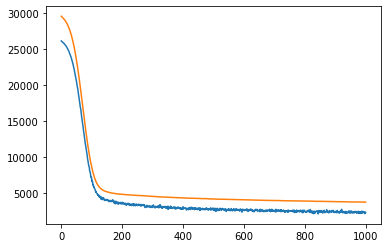

In [13]:
from tensorflow.keras.models import load_model
model0 = load_model('model0/')

test_predictions = model0.predict(X_test).flatten()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [14]:
# Evaluating 
print("MSE:",metrics.mean_squared_error (y_test,test_predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error (y_test,test_predictions)))
print("RRMSE:",np.sqrt(metrics.mean_squared_error (y_test,test_predictions))/y_test.mean())
print("MAE:", metrics.mean_absolute_error (y_test, test_predictions))
print("RMAE:", metrics.mean_absolute_error (y_test, test_predictions)/y_test.mean())
print("EV:", metrics.explained_variance_score(y_test,test_predictions))
print("R2:", metrics.r2_score(y_test,test_predictions))

MSE: 3796.419374065114
RMSE: 61.615090473561054
RRMSE: 0.4013712894958891
MAE: 39.54222925761969
RMAE: 0.25758487774164934
EV: 0.3881662242014414
R2: 0.3802877898841285
